In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

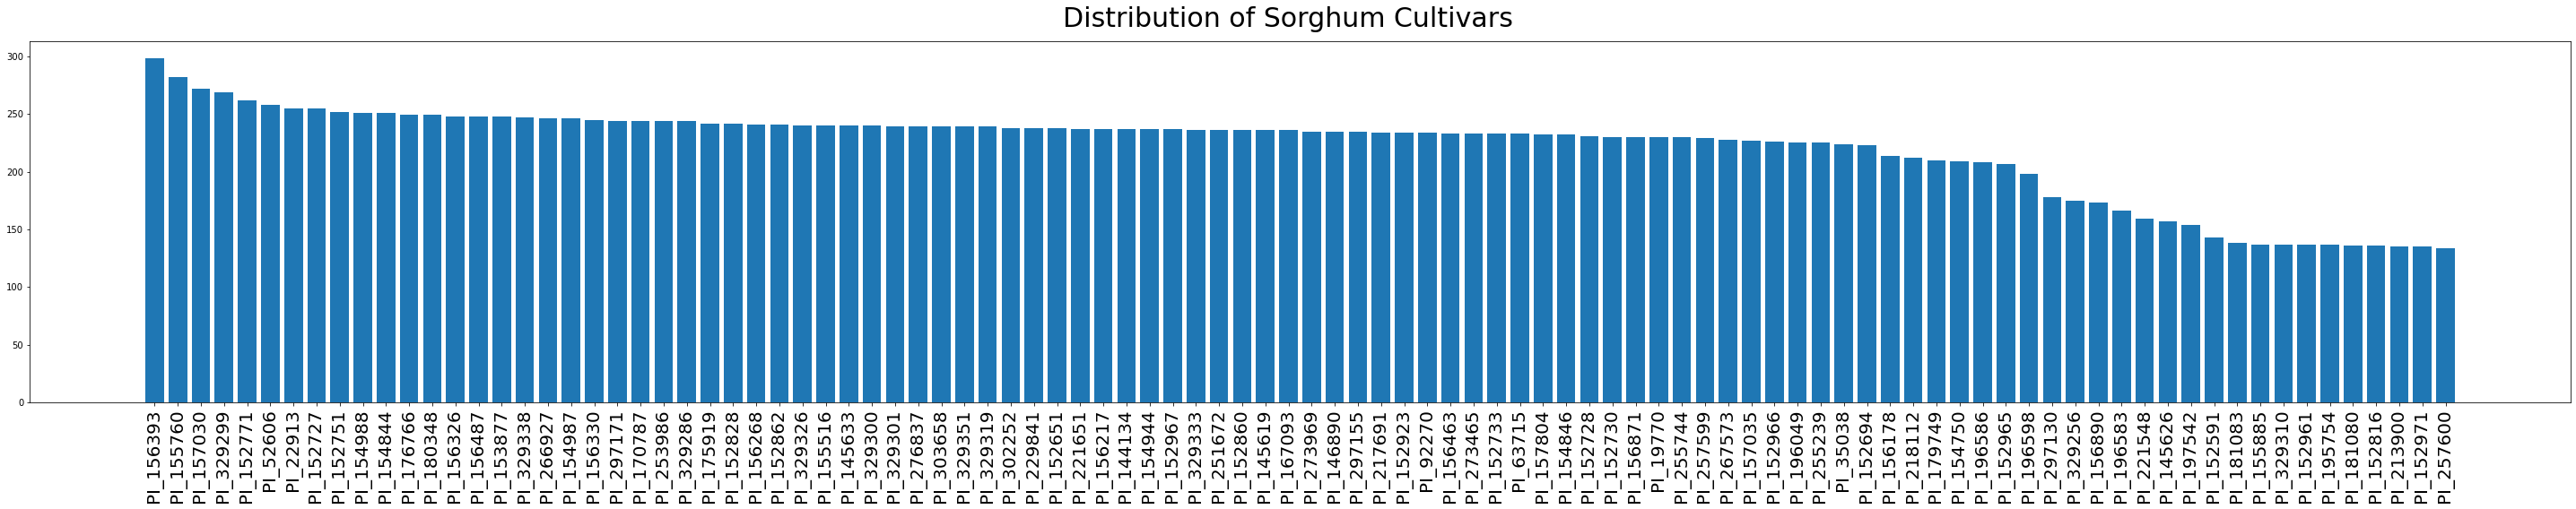

In [4]:
PATH = 'data/'
TRAIN_PATH = PATH + 'train_images/'
train_data_path = PATH + 'train_cultivar_mapping.csv'
train_table = pd.read_csv(train_data_path)
unique_cultivars = train_table['cultivar'].value_counts().to_dict()
unique_cultivars_names = list(unique_cultivars.keys())
unique_cultivars_values = list(unique_cultivars.values())

fig, axs = plt.subplots(1, 1, figsize=(40, 8), sharey=True)
axs.bar(unique_cultivars_names, unique_cultivars_values)
axs.tick_params(axis='x', rotation=90)
plt.xticks(fontsize=20)

title = 'Distribution of Sorghum Cultivars'
fig.suptitle(title,fontsize=30)
plt.tight_layout()
plt.savefig(f"figures/{title}")
plt.show()

In [15]:
with open('plots/modelefficientnetb2.npy', 'rb') as f:
    train_acc_b2 = np.load(f)
    test_acc_b2 = np.load(f)
    
with open('plots/modelefficientnetb4_nonPretrained.npy', 'rb') as f:
    train_acc_b4_notP = np.load(f)
    test_acc_b4_notP = np.load(f)
    
with open('plots/modelefficientnetb4.npy', 'rb') as f:
    train_acc_b4 = np.load(f)
    test_acc_b4 = np.load(f)
    


# EfficientNets comparison

In [17]:
len(test_acc_b4)

10

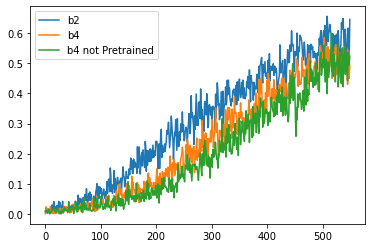

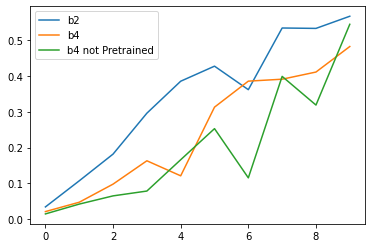

In [4]:
plt.plot(train_acc_b2,label='b2')
plt.plot(train_acc_b4,label='b4')
plt.plot(train_acc_b4_notP,label='b4 not Pretrained')
plt.legend()
plt.show()

plt.plot(test_acc_b2,label='b2')
plt.plot(test_acc_b4,label='b4')
plt.plot(test_acc_b4_notP,label='b4 not Pretrained')
plt.legend()
plt.show()

# Using EfficientNetb2: Normal,Normalized, Grayscale, Equilized and Grayscale+Equalized

In [5]:
with open('plots/modelefficientnetb2.npy', 'rb') as f:
    train_acc_normalized = np.load(f)
    test_acc_normalized = np.load(f)

with open('plots/modelefficientnetb2_notNormalized.npy', 'rb') as f:
    train_acc_normal = np.load(f)
    test_acc_normal = np.load(f)

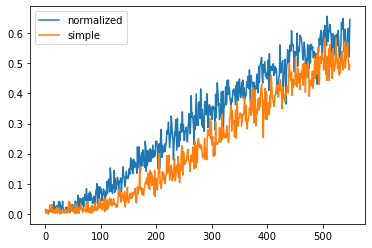

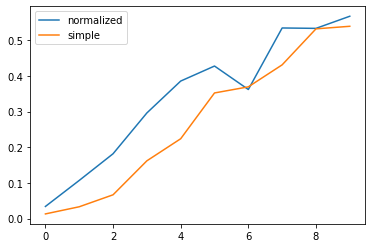

In [6]:
plt.plot(train_acc_normalized,label='normalized')
plt.plot(train_acc_normal,label='simple')
plt.legend()
plt.show()

plt.plot(test_acc_normalized,label='normalized')
plt.plot(test_acc_normal,label='simple')
plt.legend()
plt.show()

 # Full Data Augmentation

In [7]:
with open('plots/efficientNetb0-FullDataAugmentation-512.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)
    

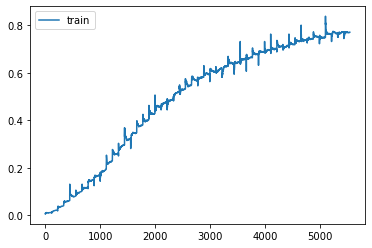

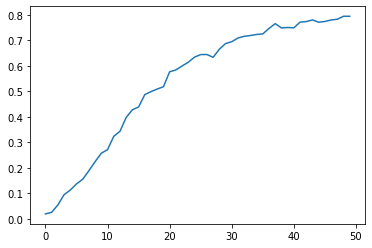

In [8]:
plt.plot(train_acc,label='train')
plt.legend()
plt.show()

plt.plot(test_acc,label='test')
plt.show()

In [2]:
with open('plots/efficientNetb0-FullDataAugmentation-512_retrained.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

In [3]:
len(test_acc)

5

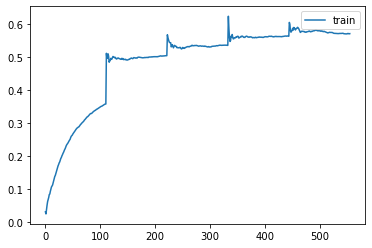

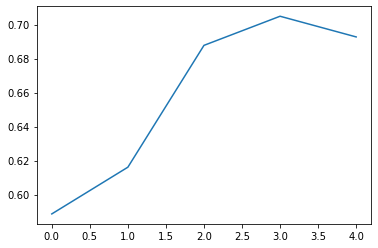

In [4]:
plt.plot(train_acc,label='train')
plt.legend()
plt.show()

plt.plot(test_acc,label='test')
plt.show()

In [49]:
with open('plots/efficientNetb0-FullDataAugmentation-512-retrainedv2.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

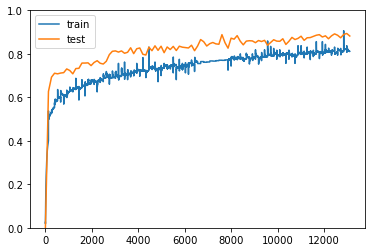

In [50]:
plt.plot(train_acc,label='train')
plt.plot(np.arange(len(test_acc)+1)*131,[0]+list(test_acc),label='test')
plt.ylim(0,1)
plt.legend()
plt.show()

In [51]:
train_acc[-1]

0.8114503816793893

In [52]:
test_acc[-1]

0.881981981981982

In [53]:
print(f'Number of epochs {len(test_acc)}')

Number of epochs 100


In [2]:
with open('plots/efficientNetb0-FullDataAugmentation-512-retrainedv5_clahe.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

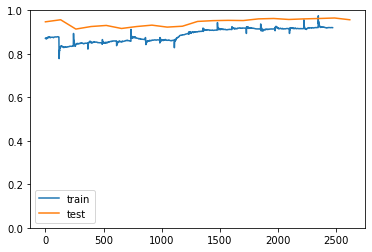

In [11]:
plt.plot(train_acc[131:],label='train')
plt.plot(np.arange(len(test_acc))*131,list(test_acc[:]),label='test')
plt.ylim(0,1)
plt.legend()
plt.show()

In [29]:
with open('plots/efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

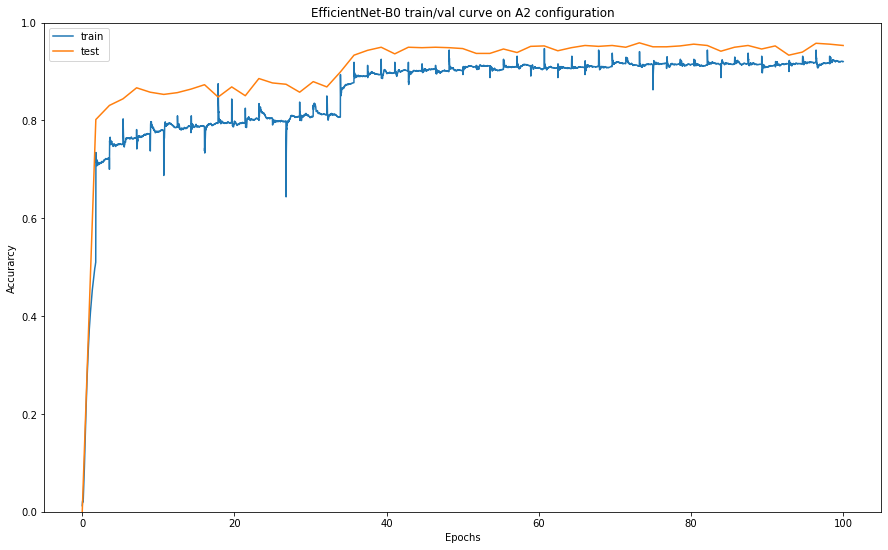

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 50656)
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/anaconda/envs/py38_default/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/anaconda/envs/py38_default/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/anaconda/envs/py38_default/lib/python3.8/socketserver.py", line 747, in __init__
    self.handle()
  File "/dsvm/tools/spark/current/python/pyspark/accumulators.py", line 260, in handle
    poll(authenticate_and_accum_updates)
  File "/dsvm/tools/spark/current/python/pyspark/accumulators.py", line 235, in poll
    if func():
  File "/dsvm/tools/spark/current/python/pyspark/accumula

In [30]:
plt.figure(figsize=(15,9))
plt.plot(np.linspace(0,100,len(train_acc)),train_acc,label='train')
plt.plot(np.linspace(0,100,len(test_acc)+1),[0]+list(test_acc),label='test')
plt.ylim(0,1)
plt.xlabel("Epochs")
plt.ylabel("Accurarcy")
plt.title("EfficientNet-B0 train/val curve on A2 configuration")
plt.legend()
plt.savefig("figures/EfficientNet-B0_curve A2")
plt.show()

In [38]:
with open('plots/efficientNetb4-FullSettings_lr_1e-4.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

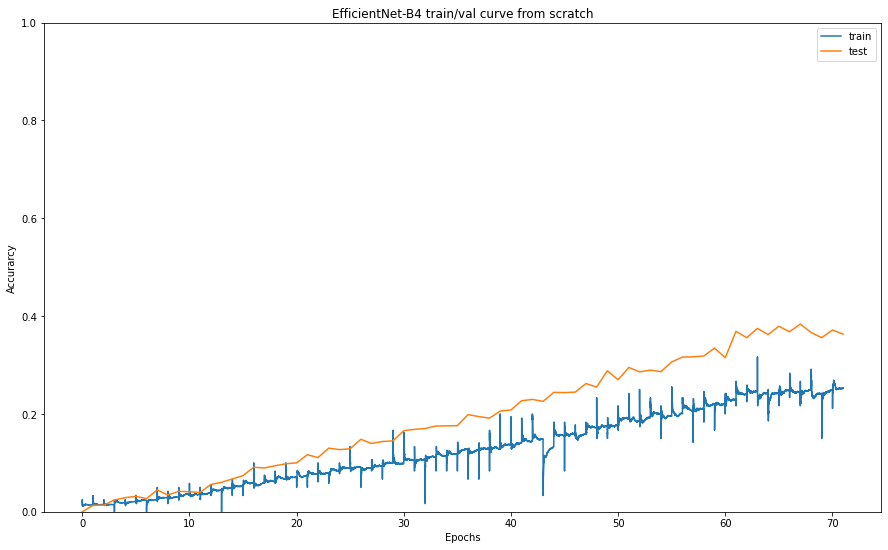

In [39]:
plt.figure(figsize=(15,9))
plt.plot(np.linspace(0,len(test_acc),len(train_acc)),train_acc,label='train')
plt.plot(np.linspace(0,len(test_acc),len(test_acc)+1),[0]+list(test_acc),label='test')
plt.ylim(0,1)
plt.xlabel("Epochs")
plt.ylabel("Accurarcy")
plt.title("EfficientNet-B4 train/val curve from scratch")
plt.legend()
plt.savefig("figures/EfficientNet-B4_scratch")
plt.show()

In [40]:
print(f'Number of epochs {len(test_acc)}')

Number of epochs 71


In [41]:
with open('plots/efficientNetb4-FullSettings_pretrained.npy', 'rb') as f:
    train_acc = np.load(f)
    test_acc = np.load(f)

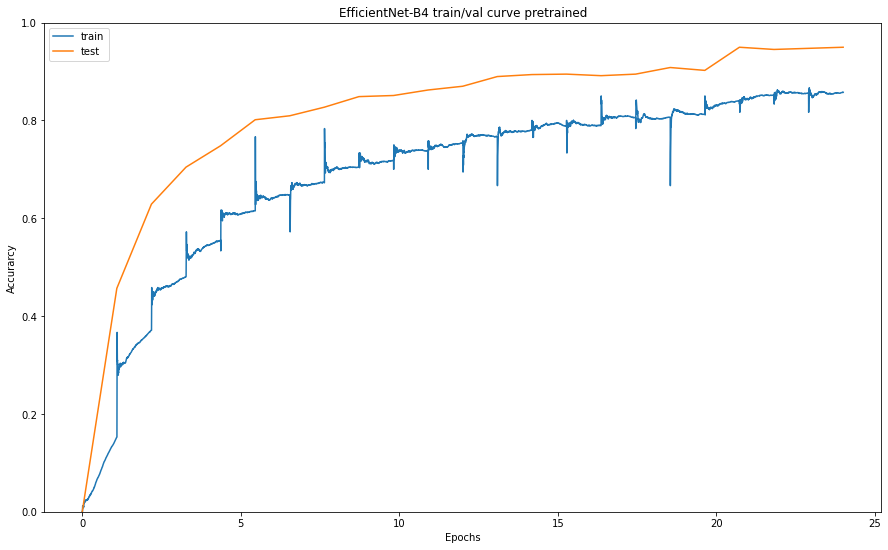

In [45]:
plt.figure(figsize=(15,9))
plt.plot(np.linspace(0,len(test_acc),len(train_acc)),train_acc,label='train')
plt.plot(np.linspace(0,len(test_acc),len(test_acc)-1),list(test_acc[1:]),label='test')
plt.ylim(0,1)
plt.xlabel("Epochs")
plt.ylabel("Accurarcy")
plt.title("EfficientNet-B4 train/val curve pretrained")
plt.legend()
plt.savefig("figures/EfficientNet-B4_pretrained")
plt.show()

Last trained until 74 epochs.

In [47]:
with open('embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe_training2d.npy', 'rb') as f:
    full_data_train = np.load(f,allow_pickle=True)
    
with open('embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe_testing2d.npy', 'rb') as f:
    full_data_test = np.load(f,allow_pickle=True)
    
with open('embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe_training2d_notrans.npy', 'rb') as f:
    full_data_train_no_trans = np.load(f,allow_pickle=True)
    labels_full_data = np.load(f,allow_pickle=True)
    
modelname = 'efficientNetb0-conservative_clahe_from_pretrained'
# with open(f'embeddings/{modelname}_training2d_notrans.npy', 'rb') as f:
#     array = np.load(f,allow_pickle=True)
    
with open(f'embeddings/{modelname}_testing2d.npy', 'rb') as f:
    array = np.load(f,allow_pickle=True)
    
with open(f'embeddings/{modelname}_training2d_notrans.npy', 'rb') as f:
    training_conservative = np.load(f,allow_pickle=True)
    labels2 = np.load(f,allow_pickle=True)
    
    
with open(f'embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv5_clahetraining_embeddings_A32d.npy', 'rb') as f:
    data_aug_v5_train = np.load(f,allow_pickle=True)
    labels_data_aug_v5_train = np.load(f,allow_pickle=True)
    
with open(f'embeddings/model1training_embeddings_A32d.npy', 'rb') as f:
    model1_train = np.load(f,allow_pickle=True)
    labels_model1_train = np.load(f,allow_pickle=True)

In [48]:
# x = array3[:,0]
# y = array3[:,1]
# x1 = array[:,0]
# y1 = array[:,1]
import pickle
number_of_classes = 4
indices = [(i,np.where(labels2 == i*number_of_classes)) for i in range(1,number_of_classes)]
with open('mapping.pkl', 'rb') as f:
        mapping = pickle.load(f)

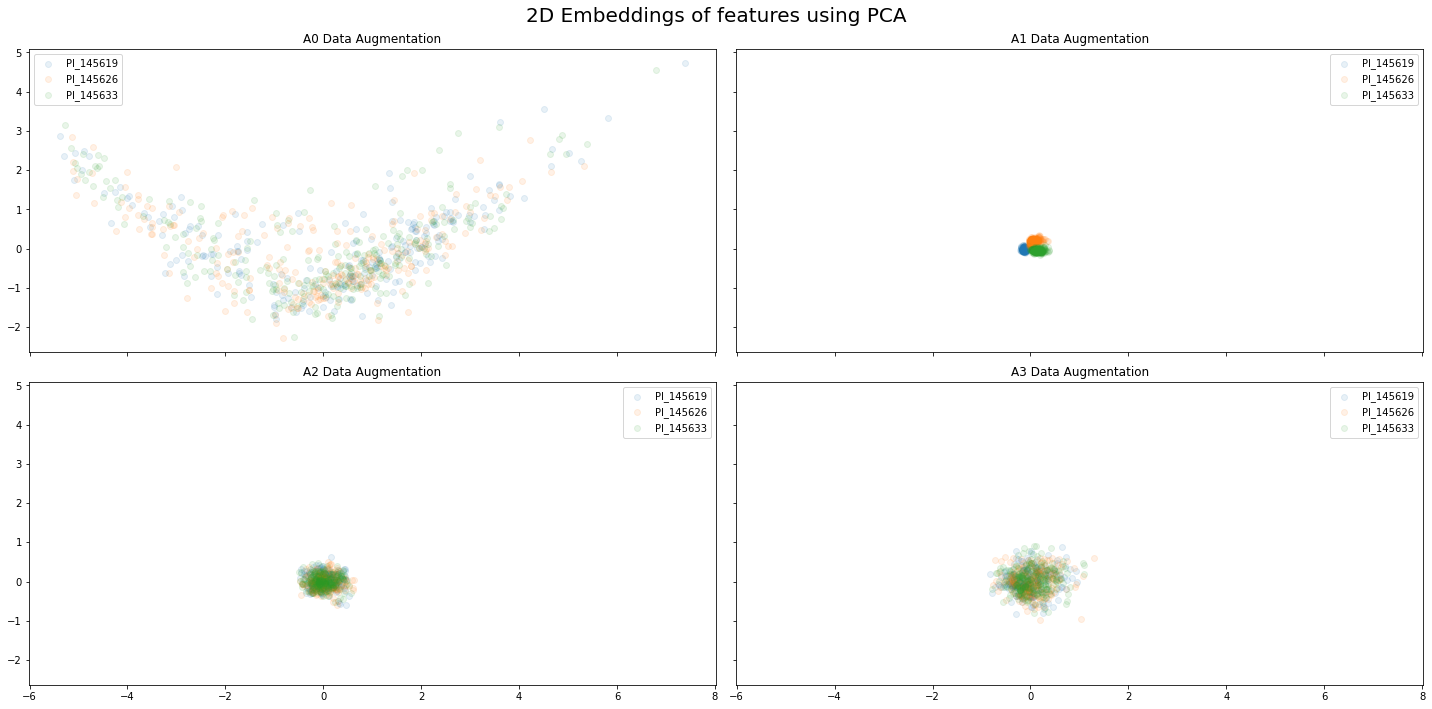

In [49]:
f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10), sharey=True, sharex=True)

alpha_level = 0.1
for i,idx in indices:
    ax1[0].scatter(model1_train[:,0][idx],
                model1_train[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax1[1].scatter(training_conservative[:,0][idx],
                training_conservative[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax2[0].scatter(full_data_train_no_trans[:,0][idx],
                full_data_train_no_trans[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax2[1].scatter(data_aug_v5_train[:,0][idx],
                data_aug_v5_train[:,1][idx],alpha=alpha_level,label=mapping[i])
    
ax1[0].legend()
ax1[0].set_title("A0 Data Augmentation")
ax1[1].legend()
ax1[1].set_title("A1 Data Augmentation")
ax2[0].legend()
ax2[0].set_title("A2 Data Augmentation")
ax2[1].legend()
ax2[1].set_title("A3 Data Augmentation")
# ax2.axis("off")
plt.suptitle("2D Embeddings of features using PCA",fontsize=20)
plt.tight_layout()
# plt.savefig("figures/2DEmbeddings")
plt.show()

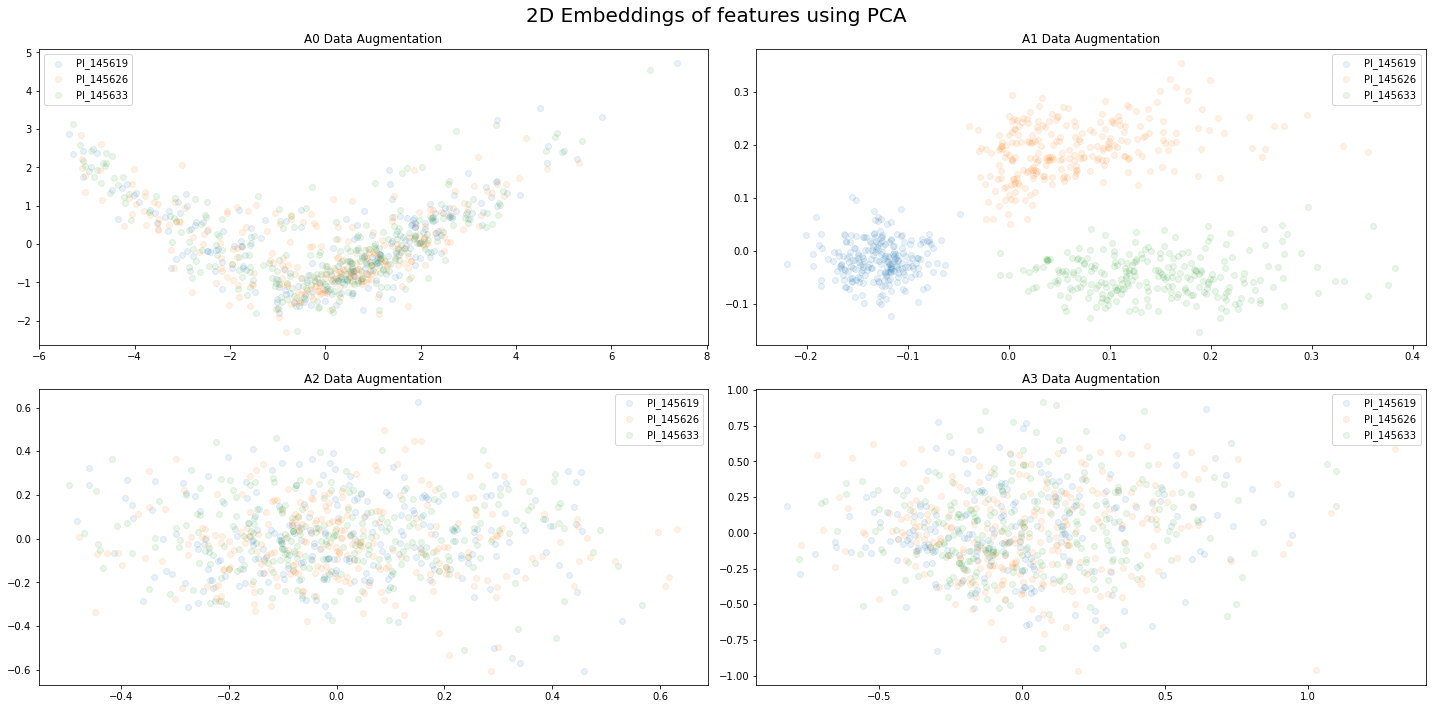

In [50]:
f, (ax1, ax2) = plt.subplots(2, 2,figsize=(20,10))

alpha_level = .1
for i,idx in indices:
    ax1[0].scatter(model1_train[:,0][idx],
                model1_train[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax1[1].scatter(training_conservative[:,0][idx],
                training_conservative[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax2[0].scatter(full_data_train_no_trans[:,0][idx],
                full_data_train_no_trans[:,1][idx],alpha=alpha_level,label=mapping[i])
    ax2[1].scatter(data_aug_v5_train[:,0][idx],
                data_aug_v5_train[:,1][idx],alpha=alpha_level,label=mapping[i])
    
ax1[0].legend()
ax1[0].set_title("A0 Data Augmentation")
ax1[1].legend()
ax1[1].set_title("A1 Data Augmentation")
ax2[0].legend()
ax2[0].set_title("A2 Data Augmentation")
ax2[1].legend()
ax2[1].set_title("A3 Data Augmentation")
# ax2.axis("off")
plt.suptitle("2D Embeddings of features using PCA",fontsize=20)
plt.tight_layout()
# plt.savefig("figures/2DEmbeddingsZoom")
plt.show()

In [27]:
from scipy.spatial import distance_matrix
import seaborn as sns

In [35]:
with open(f'embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv5_clahetraining_embeddings_A32d.npy', 'rb') as f:
    A3_2d = np.load(f,allow_pickle=True)
    labels_data_aug_v5_train = np.load(f,allow_pickle=True)
with open(f'embeddings/efficientNetb0-FullDataAugmentation-512-retrainedv5_clahetraining_embeddings_A3.npy', 'rb') as f:
    A3 = np.load(f,allow_pickle=True)
    labels_data_aug_v5_train = np.load(f,allow_pickle=True)
    
with open(f'embeddings/{modelname}_training2d_notrans.npy', 'rb') as f:
    A1_2d = np.load(f,allow_pickle=True)
    labels2 = np.load(f,allow_pickle=True)

        
with open(f'embeddings/{modelname}_training_notrans.npy', 'rb') as f:
    A1 = np.load(f,allow_pickle=True)
    labels2 = np.load(f,allow_pickle=True)

In [48]:
subset_of_points = 200
dm_A3_plane = distance_matrix(A3_2d[:subset_of_points],A3_2d[:subset_of_points])

dm_A3 = distance_matrix(A3[:subset_of_points],A3[:subset_of_points])

dm_A1_plane = distance_matrix(A1_2d[:subset_of_points],A1_2d[:subset_of_points])
dm_A1 = distance_matrix(A1[:subset_of_points],A1[:subset_of_points])

<ipython-input-54-ec1b1bec587c>:22: RuntimeWarning: invalid value encountered in true_divide
  dm_A1/dm_A1_plane, annot=False, cmap='RdBu_r',
<ipython-input-54-ec1b1bec587c>:29: RuntimeWarning: invalid value encountered in true_divide
  dm_A3/dm_A3_plane, annot=False, cmap='RdBu_r',


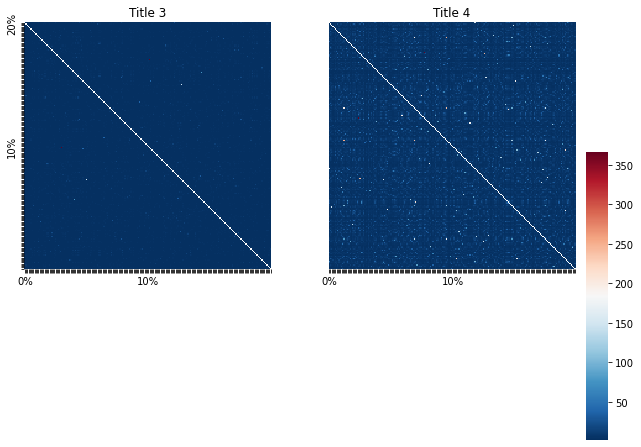

In [54]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))
xticks = ['{0:.0%}'.format(i/1000) if i % 100 == 0 else '' for i in range(subset_of_points)]
yticks = ['{0:.0%}'.format(i/1000) if i % 100 == 0 else '' for i in range(subset_of_points, 0, -1)]
# ax = plt.subplot(2, 2, 1)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# sns.heatmap(
#     dm_A1_plane/dm_A1_plane, annot=False, cmap='RdBu_r',
#     xticklabels=False, yticklabels=yticks, cbar=False, ax=ax)
# ax.set_title('Title 1')
# ax.set_aspect('equal')

# ax = plt.subplot(2, 2, 2)
# sns.heatmap(
#     dm_A3_plane/dm_A3_plane, annot=False, cmap='RdBu_r',
#     xticklabels=False, yticklabels=False, cbar=False, ax=ax)
# ax.set_title('Title 2')
# ax.set_aspect('equal')

ax = plt.subplot(2, 2, 1)
sns.heatmap(
    dm_A1/dm_A1_plane, annot=False, cmap='RdBu_r',
    xticklabels=xticks, yticklabels=yticks, cbar=False, ax=ax)
ax.set_title('Title 3')
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 2)
sns.heatmap(
    dm_A3/dm_A3_plane, annot=False, cmap='RdBu_r',
    xticklabels=xticks, yticklabels=False, cbar=True, cbar_ax=cbar_ax, ax=ax)
ax.set_title('Title 4')
ax.set_aspect('equal')
# fig.tight_layout()